# Unit 5 Demonstration – Equivalence Partitioning

This notebook demonstrates **Equivalence Partitioning** using a Python script that groups integers based on the relation `(x - y) % 4 == 0`.

We'll observe how the function groups input values and discuss how this relates to software testing and secure development practices.

In [6]:
# equivalence.py – Equivalence Partitioning Script
def equivalence_partition(iterable, relation):
    classes = []
    partitions = {}
    for o in iterable:
        found = False
        for c in classes:
            if relation(next(iter(c)), o):
                c.add(o)
                partitions[o] = c
                found = True
                break
        if not found:
            classes.append(set([o]))
            partitions[o] = classes[-1]
    return classes, partitions

def check_equivalence_partition(classes, partitions, relation):
    for o, c in partitions.items():
        for _c in classes:
            assert (o in _c) ^ (_c is not c)
    for c1 in classes:
        for o1 in c1:
            for c2 in classes:
                for o2 in c2:
                    assert (c1 is c2) ^ (not relation(o1, o2))

def test_equivalence_partition():
    relation = lambda x, y: (x - y) % 4 == 0
    classes, partitions = equivalence_partition(range(-3, 5), relation)
    check_equivalence_partition(classes, partitions, relation)
    for c in classes:
        print(c)
    for o, c in partitions.items():
        print(o, ':', c)

## Running the Partition Test Run the Test Function

Execute the function below to see how the integers `-3` to `4` are partitioned into equivalence classes.

In [7]:
test_equivalence_partition()

{1, -3}
{2, -2}
{3, -1}
{0, 4}
-3 : {1, -3}
-2 : {2, -2}
-1 : {3, -1}
0 : {0, 4}
1 : {1, -3}
2 : {2, -2}
3 : {3, -1}
4 : {0, 4}


## Manual Verification Reflection

- This partitioning helps test fewer but representative values.
- Especially useful for input validation and control flow security.
- Each group ensures that all values are logically equivalent under the defined relation.

## Alternate Relation – Modulo 3 Alternate Relation – Modulo 3

Now we explore a different equivalence relation: `(x - y) % 3 == 0`. This helps us understand how changing the logic affects the grouping.

In [8]:
# Alternate relation using modulo 3
relation_mod3 = lambda x, y: (x - y) % 3 == 0
classes_mod3, partitions_mod3 = equivalence_partition(range(-3, 5), relation_mod3)

print("Classes under (x - y) % 3 == 0:")
for c in classes_mod3:
    print(c)

Classes under (x - y) % 3 == 0:
{0, 3, -3}
{1, 4, -2}
{2, -1}


## Comparing Class Sizes Compare Class Sizes

This gives us a clearer view of how the original and modified relations affect grouping.

In [9]:
# Compare class sizes under mod 4 and mod 3
relation_mod4 = lambda x, y: (x - y) % 4 == 0
classes_mod4, _ = equivalence_partition(range(-3, 5), relation_mod4)

print("Original relation (mod 4) class sizes:")
for i, c in enumerate(classes_mod4):
    print(f"Class {i}: size = {len(c)} -> {c}")

print("\nModified relation (mod 3) class sizes:")
for i, c in enumerate(classes_mod3):
    print(f"Class {i}: size = {len(c)} -> {c}")

Original relation (mod 4) class sizes:
Class 0: size = 2 -> {1, -3}
Class 1: size = 2 -> {2, -2}
Class 2: size = 2 -> {3, -1}
Class 3: size = 2 -> {0, 4}

Modified relation (mod 3) class sizes:
Class 0: size = 3 -> {0, 3, -3}
Class 1: size = 3 -> {1, 4, -2}
Class 2: size = 2 -> {2, -1}


## Visualising Class Sizes with Matplotlib Now I Visualise Class Sizes with Matplotlib

To further demonstrate the difference in equivalence class sizes under different relations, I plotted bar charts. This helps me clearly see how changing the relation logic impacts the distribution of grouped values.

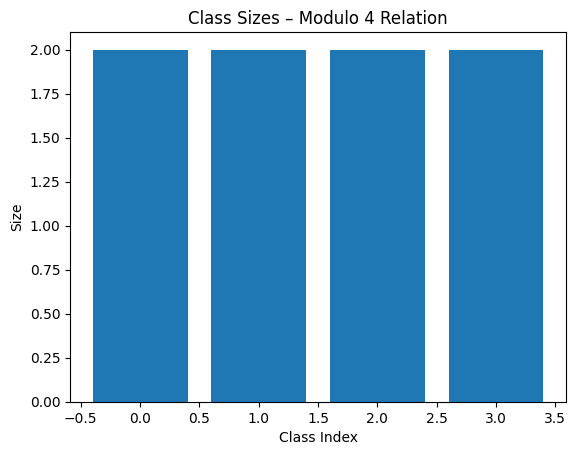

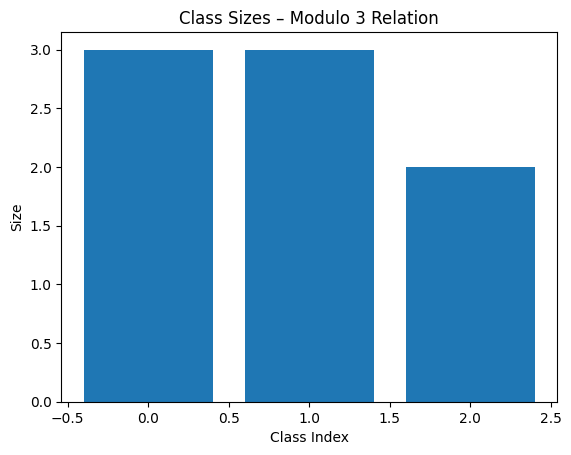

In [10]:
import matplotlib.pyplot as plt

# Get sizes of each class
mod4_sizes = [len(c) for c in classes_mod4]
mod3_sizes = [len(c) for c in classes_mod3]

# Plotting Modulo 4
plt.bar(range(len(mod4_sizes)), mod4_sizes)
plt.title("Class Sizes – Modulo 4 Relation")
plt.xlabel("Class Index")
plt.ylabel("Size")
plt.show()

# Plotting Modulo 3
plt.bar(range(len(mod3_sizes)), mod3_sizes)
plt.title("Class Sizes – Modulo 3 Relation")
plt.xlabel("Class Index")
plt.ylabel("Size")
plt.show()

## Observed Output Manual Verification of Relation Logic

In [11]:
# Manual check of equivalence logic
print("Are 1 and -3 equivalent under mod 4?", (1 - (-3)) % 4 == 0)
print("Are 2 and -3 equivalent under mod 4?", (2 - (-3)) % 4 == 0)

Are 1 and -3 equivalent under mod 4? True
Are 2 and -3 equivalent under mod 4? False


## Custom Equivalence Logic Tests Manual Test Suite for Equivalence Logic

In [12]:
def test_relation_equivalence():
    assert (1 - (-3)) % 4 == 0
    assert (0 - 4) % 4 == 0
    assert not (2 - 3) % 4 == 0
    assert (2 - (-2)) % 4 == 0
    print("All manual equivalence tests passed.")

test_relation_equivalence()

All manual equivalence tests passed.
